In [1]:
# Pandas 라이브러리 임포트
import pandas as pd 
from pandas import Series, DataFrame

In [2]:
# 1. 빈 데이터프레임 생성
df = DataFrame()
df

""


In [4]:
# 2. 데이터프레임 생성하고 데이터 할당하기
df2 = DataFrame([
                    [1,2,3],
                    ['kim','park','lee']
                ])
df2

,0,1,2
0,1,2,3
1,kim,park,lee


In [5]:
df2 = DataFrame([
                    [1,2,3],
                    ['kim','park','lee']
                ],
                index = ['A','B'], #로우 인덱스
                columns = ['X','Y','Z']) #칼럼 인덱스
df2

,X,Y,Z
A,1,2,3
B,kim,park,lee


In [6]:
# 3. 사전 타입 데이터를 이용하여 데이터 프레임 생성하기
인구통계 = {'서울': [950, 945, 938.5],
            '대전': [50, 151, 145],
            '대구': [85, 88, 92],
            '부산': [180, 187, 192],
            '광주': [74, 80, 80]
            }
인구통계

{'서울': [950, 945, 938.5],
 '대전': [50, 151, 145],
 '대구': [85, 88, 92],
 '부산': [180, 187, 192],
 '광주': [74, 80, 80]}

In [8]:
df3 = DataFrame(인구통계, index=[2018,2019,2020])
df3

,서울,대전,대구,부산,광주
2018,950.0,50,85,180,74
2019,945.0,151,88,187,80
2020,938.5,145,92,192,80


### 2.2.2. DataFrame 속성 조회하기 (속성을 조회할 때에는 ()를 사용하지 않으니 유의)

In [9]:
#1. index : 데이터프레임의 인덱스를 리스트로 반환
df3.index

Int64Index([2018, 2019, 2020], dtype='int64')

In [10]:
#2. columns : 데이터프레임의 컬럼을 리스트로 반환
df3.columns

Index(['서울', '대전', '대구', '부산', '광주'], dtype='object')

In [11]:
#3. values : 데이터프레임의 데이터 반환 (ndarray)
df3.values

array([[950. ,  50. ,  85. , 180. ,  74. ],
       [945. , 151. ,  88. , 187. ,  80. ],
       [938.5, 145. ,  92. , 192. ,  80. ]])

In [12]:
type(df3.values)

numpy.ndarray

In [13]:
#4. shape : 행(row)과 열(column)의 개수(차원)을 튜플로 반환
df3.shape

(3, 5)

In [14]:
#5. T (Transpose) : 행과 열을 바꾸기.
df3.T

,2018,2019,2020
서울,950.0,945.0,938.5
대전,50.0,151.0,145.0
대구,85.0,88.0,92.0
부산,180.0,187.0,192.0
광주,74.0,80.0,80.0


In [15]:
#6. axes : 행과 열 이름을 리스트로 반환
df3.axes

[Int64Index([2018, 2019, 2020], dtype='int64'),
 Index(['서울', '대전', '대구', '부산', '광주'], dtype='object')]

In [16]:
#7. dtypes : 컬럼별 데이터타입 반환
df3.dtypes

서울    float64
대전      int64
대구      int64
부산      int64
광주      int64
dtype: object

In [17]:
#8. size : DataFrame의 원소의 개수를 반환
df3.size

15

### 2.2.3. 데이터프레임 기본 함수

In [18]:
#1. info() - 기본 정보 출력
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 2018 to 2020
Data columns (total 5 columns):
서울    3 non-null float64
대전    3 non-null int64
대구    3 non-null int64
부산    3 non-null int64
광주    3 non-null int64
dtypes: float64(1), int64(4)
memory usage: 224.0 bytes


In [21]:
인구통계1 = {'서울': [950, 945, 938.5],
            '대전': [50, 151, 145],
            '대구': [85, 88, 92],
            '부산': [180, 187, 192],
            '광주': [74, '-', 80] # object로 뜸
            }
인구통계1
df3_1 = DataFrame(인구통계1, index=[2018,2019,2020])
df3_1
df3_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 2018 to 2020
Data columns (total 5 columns):
서울    3 non-null float64
대전    3 non-null int64
대구    3 non-null int64
부산    3 non-null int64
광주    3 non-null object
dtypes: float64(1), int64(3), object(1)
memory usage: 144.0+ bytes


In [19]:
#2. describe() - 기본 통계 정보 출력
df3.describe()

,서울,대전,대구,부산,광주
count,3.000000,3.000000,3.000000,3.000000,3.000000
mean,944.500000,115.333333,88.333333,186.333333,78.000000
std,5.766281,56.659804,3.511885,6.027714,3.464102
min,938.500000,50.000000,85.000000,180.000000,74.000000
25%,941.750000,97.500000,86.500000,183.500000,77.000000
50%,945.000000,145.000000,88.000000,187.000000,80.000000
75%,947.500000,148.000000,90.000000,189.500000,80.000000
max,950.000000,151.000000,92.000000,192.000000,80.000000


In [22]:
# 통계 함수 (mean, sum, max, min, ...)
df3.mean()

서울    944.500000
대전    115.333333
대구     88.333333
부산    186.333333
광주     78.000000
dtype: float64

In [24]:
df3.quantile(0.5)

서울    945.0
대전    145.0
대구     88.0
부산    187.0
광주     80.0
Name: 0.5, dtype: float64

In [25]:
df3.mean(axis=0) #column별로 나옴

서울    944.500000
대전    115.333333
대구     88.333333
부산    186.333333
광주     78.000000
dtype: float64

In [26]:
df3.mean(axis=1) #row별로 나옴

2018    267.8
2019    290.2
2020    289.5
dtype: float64

In [27]:
# 3. sample() - 일부 데이터를 랜덤으로 선택
df3.sample()

,서울,대전,대구,부산,광주
2020,938.5,145,92,192,80


In [28]:
df3.sample(n=2)

,서울,대전,대구,부산,광주
2019,945.0,151,88,187,80
2020,938.5,145,92,192,80


In [31]:
df3.sample(frac=0.6, replace=True, random_state=100, axis=0)
#frac: 추출할 표본 비율
#replace: 복원 추출 여부
#random_state: 재현가능성 위해

,서울,대전,대구,부산,광주
2018,950.0,50,85,180,74
2018,950.0,50,85,180,74


In [32]:
# 4. head, tail(x) - 맨 앞 혹은 맨 뒤의 x개의 데이터만 출력
df3.head(2)
df3.tail(2)

,서울,대전,대구,부산,광주
2019,945.0,151,88,187,80
2020,938.5,145,92,192,80


In [33]:
# 5. nunique() - unique한 값의 개수
df3.nunique()

서울    3
대전    3
대구    3
부산    3
광주    2
dtype: int64

<AxesSubplot:>

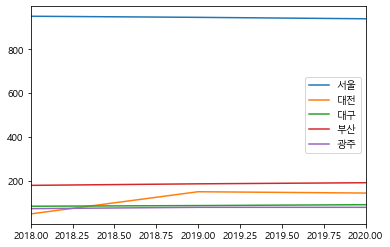

In [35]:
# 6. plot() - 데이터 시각화 
import matplotlib as plt
plt.rcParams['font.family']='Malgun Gothic'
df3.plot()
# df3.plot(kind='bar')

In [36]:
# 7. filter() - 원하는 데이터만 선택 
df3.filter(['서울'])

,서울
2018,950.0
2019,945.0
2020,938.5


In [37]:
#서울과 대구만 선택
df3.filter(['서울','대구'])

,서울,대구
2018,950.0,85
2019,945.0,88
2020,938.5,92


In [38]:
#2018, 2019년 데이터만 선택
df3.filter([2018,2019], axis=0)

,서울,대전,대구,부산,광주
2018,950.0,50,85,180,74
2019,945.0,151,88,187,80


In [39]:
#정규표현식 활용
df3.filter(regex='^대') #'대'로 시작하는 컬럼을 모두 선택
df3.filter(regex='울$') #'울'로 끝나는 컬럼을 모두 선택

,서울
2018,950.0
2019,945.0
2020,938.5


In [44]:
#2010년대 데이터만 선택 (2010, 2011, ... , 2019)
df3.filter(regex='^201', axis=0)

,서울,대전,대구,부산,광주
2018,950.0,50,85,180,74
2019,945.0,151,88,187,80


In [45]:
#10년 단위의 데이터만 선택 (1990, 2000, 2010, 2020, ...)
df3.filter(regex='0$', axis=0)

,서울,대전,대구,부산,광주
2020,938.5,145,92,192,80


# 3-3차시

### 2.2.3. 데이터프레임 조회하기

In [46]:
# 테스트 데이터프레임 생성
df4 = DataFrame({'Class': ['IoT','Network', 'Economy','Big Data', 'Cloud'],
                       'Year': [2018, 2017, 2018, 2018, 2019],
                       'Price': [100, 125, 132, 312, 250],
                       'Location': ['Korea','Korea', 'Korea', 'US','Korea']},
                      index=['C01','C02','C03', 'C04', 'C05'])
df4

,Class,Year,Price,Location
C01,IoT,2018,100,Korea
C02,Network,2017,125,Korea
C03,Economy,2018,132,Korea
C04,Big Data,2018,312,US
C05,Cloud,2019,250,Korea


In [47]:
# 1. 원하는 열(컬럼)만 조회하기

# 1-1) Class만 조회하기
df4['Class']

C01         IoT
C02     Network
C03     Economy
C04    Big Data
C05       Cloud
Name: Class, dtype: object

In [48]:
# 1-2) Class와 Price 조회하기
df4[['Class','Price']]

,Class,Price
C01,IoT,100
C02,Network,125
C03,Economy,132
C04,Big Data,312
C05,Cloud,250


In [51]:
# 2. 원하는 행(로우)만 조회하기 

#C03번 클래스의 데이터 선택
df4.loc['C03'] #문자인덱스->loc 
               #axis=0는 함수에서만 사용가능(여기서 쓰면 오류남)

Class       Economy
Year           2018
Price           132
Location      Korea
Name: C03, dtype: object

In [54]:
df4.iloc[2] #숫자인덱스->iloc

Class       Economy
Year           2018
Price           132
Location      Korea
Name: C03, dtype: object

In [53]:
#C02, C04 클래스 데이터 선택
df4.loc[['C02','C04']]

,Class,Year,Price,Location
C02,Network,2017,125,Korea
C04,Big Data,2018,312,US


In [56]:
# 3. 인덱스 슬라이싱 

# C02~C04 클래스 데이터 선택
df4.loc['C02':'C04'] #df4.loc[['C02','C03','C04']]

,Class,Year,Price,Location
C02,Network,2017,125,Korea
C03,Economy,2018,132,Korea
C04,Big Data,2018,312,US


In [57]:
# 슬라이싱의 경우에 loc 생략 가능
df4['C02':'C04'] #왜? 슬라이싱(:)의 경우 로우인덱스로 자동적으로 가서 loc 생략해도 됨
                 #컬럼 인덱스는 순서X, but 로우 인덱스는 순서O

,Class,Year,Price,Location
C02,Network,2017,125,Korea
C03,Economy,2018,132,Korea
C04,Big Data,2018,312,US


In [61]:
# 4. 원하는 행과 열을 선택하여 조회하기 

# C02, C03 강의의 Class와 Year만 조회
df4.loc[['C02','C03']][['Class','Year']]
#df4[['Class','Year']].loc[['C02','C03']]
#df4.loc['C02':'C03'][['Class','Year']]
#df4['C02':'C03'][['Class','Year']]

,Class,Year
C02,Network,2017
C03,Economy,2018


In [68]:
df4.loc[['C02','C03'],['Class','Year']]
#df4.loc['C02':'C03',['Class','Year']]
#df4.loc['C02':'C03','Class':'Year']

,Class,Year
C02,Network,2017
C03,Economy,2018


In [83]:
# 5. 조건 색인 

# 가격(Price)가 200 이상인 강의만 선택
df4[[False, False, False, True, True]] #True인 것만 출력

,Class,Year,Price,Location
C04,Big Data,2018,312,US
C05,Cloud,2019,250,Korea


In [85]:
df4.Price #df4['Price'] #series

C01    100
C02    125
C03    132
C04    312
C05    250
Name: Price, dtype: int64

In [86]:
df4.Price >=200

C01    False
C02    False
C03    False
C04     True
C05     True
Name: Price, dtype: bool

In [87]:
df4[df4.Price >=200]

,Class,Year,Price,Location
C04,Big Data,2018,312,US
C05,Cloud,2019,250,Korea


In [64]:
# 아래 결과들이 출력되도록 코드를 완성하시오.
# 실습 1. 'Year' 컬럼만 선택
df4[['Year']] #DataFrame

,Year
C01,2018
C02,2017
C03,2018
C04,2018
C05,2019


In [103]:
df4['Year'] #Series

C01    2018
C02    2017
C03    2018
C04    2018
C05    2019
Name: Year, dtype: int64

In [104]:
df4[['Year']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, C01 to C05
Data columns (total 1 columns):
Year    5 non-null int64
dtypes: int64(1)
memory usage: 240.0+ bytes


In [65]:
# 실습 2. 'Class'와 'Location' 컬럼만 선택
df4[['Class','Location']]

,Class,Location
C01,IoT,Korea
C02,Network,Korea
C03,Economy,Korea
C04,Big Data,US
C05,Cloud,Korea


In [66]:
# 실습 3. C01과 C03 강의의 모든 컬럼 선택
df4.loc[['C01','C03']]

,Class,Year,Price,Location
C01,IoT,2018,100,Korea
C03,Economy,2018,132,Korea


In [67]:
# 실습 4. C01~C03 강의의 Class와 Price만 선택
df4['C01':'C03'][['Class','Price']]

,Class,Price
C01,IoT,100
C02,Network,125
C03,Economy,132


In [89]:
# 실습 4. 2019년도 강의만 조회
df4[df4.Year==2019]

,Class,Year,Price,Location
C05,Cloud,2019,250,Korea


In [102]:
# 실습 5. 가장 가격이 비싼 강의 정보만 조회
df4[df4.Price==df4.Price.max()]

,Class,Year,Price,Location
C04,Big Data,2018,312,US


In [107]:
# 실습 6. 2018, 2019년도에 개설된 강의 조회
df4[(df4.Year==2018)|(df4.Year==2019)]
df4[df4.Year.isin([2018, 2019])]

,Class,Year,Price,Location
C01,IoT,2018,100,Korea
C03,Economy,2018,132,Korea
C04,Big Data,2018,312,US
C05,Cloud,2019,250,Korea


In [100]:
# 실습 7. 2018년도에 한국에서 개설된 강의 조회
df4[(df4.Year==2018)&(df4.Location=='Korea')]

,Class,Year,Price,Location
C01,IoT,2018,100,Korea
C03,Economy,2018,132,Korea


# 4-1차시

### 1. 데이터프레임에 새로운 컬럼 추가하기

In [2]:
import pandas as pd 
from pandas import Series, DataFrame

df4 = DataFrame({'Class': ['IoT','Network', 'Economy','Big Data', 'Cloud'],
                       'Year': [2018, 2017, 2018, 2018, 2019],
                       'Price': [100, 125, 132, 312, 250],
                       'Location': ['Korea','Korea', 'Korea', 'US','Korea']},
                      index=['C01','C02','C03', 'C04', 'C05'])
df4

,Class,Year,Price,Location
C01,IoT,2018,100,Korea
C02,Network,2017,125,Korea
C03,Economy,2018,132,Korea
C04,Big Data,2018,312,US
C05,Cloud,2019,250,Korea


In [3]:
# 컬럼 추가하기 1
# limitStudent 컬럼(정원)을 추가하고, 값을 모두 30으로 저장
df4['limitStudent']=30
df4

,Class,Year,Price,Location,limitStudent
C01,IoT,2018,100,Korea,30
C02,Network,2017,125,Korea,30
C03,Economy,2018,132,Korea,30
C04,Big Data,2018,312,US,30
C05,Cloud,2019,250,Korea,30


In [4]:
# 컬럼 추가하기 2.
# numStudent 컬럼(수강학생수)을 추가하고, 값을 25,30,10,23,17로 저장 
df4['numStudent']=[25,30,10,23,17]
df4

,Class,Year,Price,Location,limitStudent,numStudent
C01,IoT,2018,100,Korea,30,25
C02,Network,2017,125,Korea,30,30
C03,Economy,2018,132,Korea,30,10
C04,Big Data,2018,312,US,30,23
C05,Cloud,2019,250,Korea,30,17


In [5]:
# 컬럼 추가하기 3 (기존 컬럼에 함수를 적용한 결과로 값을 할당하기)
# priceLevel 컬럼을 추가하고, 
# Price가 200과 같거나 크면, High, 200보다 작으면 Low

# 함수 생성
def get_plevel(X):
    if X >= 200:
        return 'High'
    else:
        return 'Low'

In [8]:
# apply 함수 -> 함수를 적용하기 위한 함수
df4.sum()
df4.apply('sum')
df4.apply(lambda X: X.sum())

Class           IoTNetworkEconomyBig DataCloud
Year                                     10090
Price                                      919
Location                KoreaKoreaKoreaUSKorea
limitStudent                               150
numStudent                                 105
dtype: object

In [9]:
df4.apply(lambda X: get_plevel(X.Price), axis=1)

C01     Low
C02     Low
C03     Low
C04    High
C05    High
dtype: object

In [10]:
df4['priceLevel'] = df4.apply(lambda X: get_plevel(X.Price), axis=1)
df4

,Class,Year,Price,Location,limitStudent,numStudent,priceLevel
C01,IoT,2018,100,Korea,30,25,Low
C02,Network,2017,125,Korea,30,30,Low
C03,Economy,2018,132,Korea,30,10,Low
C04,Big Data,2018,312,US,30,23,High
C05,Cloud,2019,250,Korea,30,17,High


In [46]:
# 컬럼 추가하기 4 (기존 컬럼을 이용하여 새 컬럼 추가하기)
# income 컬럼을 추가하고, Price와 numStudent의 값을 곱한 값으로 할당


In [11]:
# 산술 연산

#1) 두 값의 연산
5+10

15

In [12]:
#2) 1차원 데이터와 값 간의 연산
sr = Series([3,5,7,9])
sr+100

0    103
1    105
2    107
3    109
dtype: int64

In [13]:
#3) sr2020 + sr2021
sr2020 = Series([4500, 2800, 3000], index=['삼성','롯데','LG'])
sr2021=Series([4500, 3500, 2500], index=['삼성','롯데','SK'])
sr2020.add(sr2021, fill_value=0)

LG    3000.0
SK    2500.0
롯데    6300.0
삼성    9000.0
dtype: float64

In [14]:
sr2020.add(sr2021)

LG       NaN
SK       NaN
롯데    6300.0
삼성    9000.0
dtype: float64

In [15]:
df4['income'] = df4.Price.mul(df4.numStudent)
df4

,Class,Year,Price,Location,limitStudent,numStudent,priceLevel,income
C01,IoT,2018,100,Korea,30,25,Low,2500
C02,Network,2017,125,Korea,30,30,Low,3750
C03,Economy,2018,132,Korea,30,10,Low,1320
C04,Big Data,2018,312,US,30,23,High,7176
C05,Cloud,2019,250,Korea,30,17,High,4250


In [16]:
# 실습. rate 컬럼을 추가하고, 충원율을 계산하여 할당. 
# 충원율은 정원(limitStudent) 대비 수강학생수(numStudent) 비율
df4['rate'] = df4.numStudent/df4.limitStudent*100
df4

,Class,Year,Price,Location,limitStudent,numStudent,priceLevel,income,rate
C01,IoT,2018,100,Korea,30,25,Low,2500,83.333333
C02,Network,2017,125,Korea,30,30,Low,3750,100.000000
C03,Economy,2018,132,Korea,30,10,Low,1320,33.333333
C04,Big Data,2018,312,US,30,23,High,7176,76.666667
C05,Cloud,2019,250,Korea,30,17,High,4250,56.666667


In [18]:
df4.round(0) #0: 소수점 첫째자리에서 반올림
df4.round({'rate':0}) #rate만 지정

,Class,Year,Price,Location,limitStudent,numStudent,priceLevel,income,rate
C01,IoT,2018,100,Korea,30,25,Low,2500,83.0
C02,Network,2017,125,Korea,30,30,Low,3750,100.0
C03,Economy,2018,132,Korea,30,10,Low,1320,33.0
C04,Big Data,2018,312,US,30,23,High,7176,77.0
C05,Cloud,2019,250,Korea,30,17,High,4250,57.0


### 2. 불필요한 컬럼이나 데이터 삭제하기

In [ ]:
# drop()
# 첫 번째 인자: 삭제하고자 하는 인덱스 명
# 두 번째 인자: axis (0 or 1)

In [19]:
# C05 강의 삭제
df4.drop('C05',0)

,Class,Year,Price,Location,limitStudent,numStudent,priceLevel,income,rate
C01,IoT,2018,100,Korea,30,25,Low,2500,83.333333
C02,Network,2017,125,Korea,30,30,Low,3750,100.000000
C03,Economy,2018,132,Korea,30,10,Low,1320,33.333333
C04,Big Data,2018,312,US,30,23,High,7176,76.666667


In [20]:
# priceLevel 강의 삭제
df4.drop('priceLevel',1)

,Class,Year,Price,Location,limitStudent,numStudent,income,rate
C01,IoT,2018,100,Korea,30,25,2500,83.333333
C02,Network,2017,125,Korea,30,30,3750,100.000000
C03,Economy,2018,132,Korea,30,10,1320,33.333333
C04,Big Data,2018,312,US,30,23,7176,76.666667
C05,Cloud,2019,250,Korea,30,17,4250,56.666667


In [21]:
# 원본을 변경하는 방법
df4.drop('priceLevel', 1, inplace=True)
df4

,Class,Year,Price,Location,limitStudent,numStudent,income,rate
C01,IoT,2018,100,Korea,30,25,2500,83.333333
C02,Network,2017,125,Korea,30,30,3750,100.000000
C03,Economy,2018,132,Korea,30,10,1320,33.333333
C04,Big Data,2018,312,US,30,23,7176,76.666667
C05,Cloud,2019,250,Korea,30,17,4250,56.666667


In [22]:
df4 = df4.drop('income', 1)
df4

,Class,Year,Price,Location,limitStudent,numStudent,rate
C01,IoT,2018,100,Korea,30,25,83.333333
C02,Network,2017,125,Korea,30,30,100.000000
C03,Economy,2018,132,Korea,30,10,33.333333
C04,Big Data,2018,312,US,30,23,76.666667
C05,Cloud,2019,250,Korea,30,17,56.666667


In [24]:
# 동시에 여러 개 삭제
# 실습. 수강생이 가장 작은 클래스를 찾아서 삭제
del_class=df4[df4.numStudent==df4.numStudent.min()]
del_class.index

Index(['C03'], dtype='object')

In [25]:
df4.drop(del_class.index, 0)

,Class,Year,Price,Location,limitStudent,numStudent,rate
C01,IoT,2018,100,Korea,30,25,83.333333
C02,Network,2017,125,Korea,30,30,100.000000
C04,Big Data,2018,312,US,30,23,76.666667
C05,Cloud,2019,250,Korea,30,17,56.666667
